# About
In this notebook, we practice loading data and dataset related operations, following chapter 1 of the book *Deep learning with PyTorch: quick start guide*

In [114]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as tf
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [4]:
# my_cifar10_train = datasets.CIFAR10(
#     root='.\cifar10',
#     train=True,
#     download=True,
#     transform=tf.ToTensor())

12.4%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

23.2%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

26.6%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

30.3%IOPub message rate exceede

Extracting .\cifar10\cifar-10-python.tar.gz to .\cifar10


In [5]:
my_cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: .\cifar10
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
len(my_cifar10_train)

50000

In [9]:
for i in range(len(my_cifar10_train)):
    print(f'size of image {my_cifar10_train[i][0].size()} label {my_cifar10_train[i][1]}')
    if i>3: break

size of image torch.Size([3, 32, 32]) label 6
size of image torch.Size([3, 32, 32]) label 9
size of image torch.Size([3, 32, 32]) label 9
size of image torch.Size([3, 32, 32]) label 4
size of image torch.Size([3, 32, 32]) label 1


<function matplotlib.pyplot.show(close=None, block=None)>

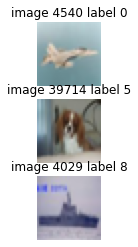

In [75]:
torch.manual_seed(666)
sample_idx = torch.randint(len(my_cifar10_train),size=(3,))
figure = plt.figure()
for i in range(len(sample_idx)):
    img, label = my_cifar10_train[sample_idx[i].item()]
    plt.subplot(3,1,i+1)
    plt.title(f'image {sample_idx[i].item()} label {label}')
    plt.axis('off')
    plt.imshow(img.permute(1,2,0))   
plt.show

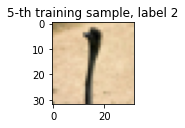

In [104]:
loader_train = DataLoader(my_cifar10_train, batch_size=32, shuffle=True)
feature_train, label_train = next(iter(loader_train)) # this is recommended in pytorch official tutorial
# alternative to the above line, one can do the following
# dataiter = iter(loader_train)
# img_iter, label_iter = dataiter.next()

id = torch.randint(32,(1,)).item()
plt.figure(figsize=(1.5,1.5))
plt.title(f'{id}-th training sample, label {label_train[id]}')
img2show = feature_train[id]
plt.imshow(img2show.permute(1,2,0))

##### Load data from folder
In order to use `Dataloader` to iterate over data, in the above example with CIFAR-10 dataset, we first create a `torch.utils.data.Dataset` class `my_cifar10_train` using data downloaded from a given pytorch data repository, the book also shows how to construct a customized dataset class. Next, we *grab data from folders* where the data are organized into subfolders as per their classes using `dataset.ImageFolder()`, after which one can continue to use `Dataloader` to feed the model.

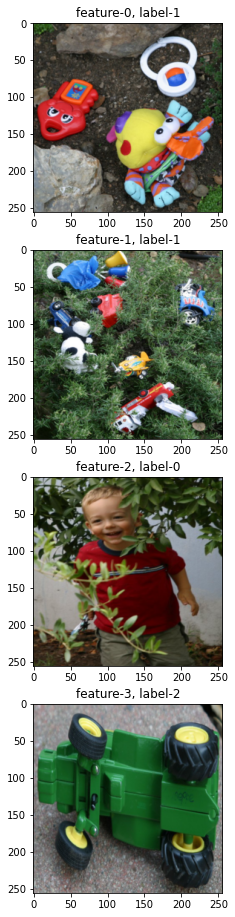

In [135]:
img_path = './dlwpt-qsg-code-original/data/toy-images/Test'
# my_tf = tf.Compose([tf.CenterCrop(300), tf.ToTensor()]) # one can apply a series of transforms in order, here the first one crop images to the same size
my_tf = tf.Compose([tf.Resize((256,256)),tf.ToTensor()]) # alternative to cropping, one can also use resize
data_from_folders = datasets.ImageFolder(img_path,transform=my_tf)
loader_from_folder = DataLoader(data_from_folders,batch_size=4,shuffle=True)
feature_folder, label_folder = next(iter(loader_from_folder))

plt.figure(figsize=(10,16))
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.title(f'feature-{i}, label-{label_folder[i]}')
    plt.imshow(feature_folder[i].permute(1,2,0))

In [130]:
data_from_folders

Dataset ImageFolder
    Number of datapoints: 141
    Root location: ./dlwpt-qsg-code-original/data/toy-images/Test
    StandardTransform
Transform: Compose(
               CenterCrop(size=(300, 300))
               ToTensor()
           )

In [131]:
len(data_from_folders)

141